In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

# Mistery Function

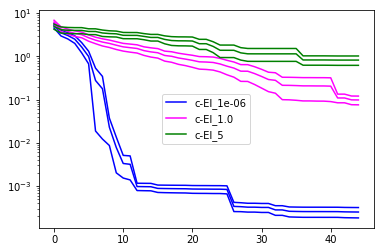

In [59]:
s=0
color=["blue", "magenta", "green"]
mistery_stats_bnch = {"noise_lvl":[],"mean":[], "MSE":[]}
for noise in [1e-06, 1.0, 5]:
    
    path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_bnch_"+str(noise)+"/"
    files = os.listdir(path)

    #best_value = np.max(f(X))
    results_1 =[]
    for i in range(len(files)):
        data = pd.read_csv(path+files[i])
        cum_val = []
        for i in range(data.values.shape[0]):
            cum_val.append(np.min(data["Opportunity_cost"].values[:i+1]))
    
        
        out = np.array(cum_val).reshape(-1)
        results_1.append(out)
    
        
    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))
    
    confidence = mean_values_mistery_bnch[-1] + 1.5*MSE_mistery_bnch[-1]
    filered_results = []
    
    for i in range(len(results_1)):
        if results_1[i][-1] < confidence:
            filered_results.append(results_1[i])  
    

        
    mean_values_mistery_bnch = np.mean(filered_results,axis=0)
    std_values = np.std(filered_results,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(filered_results)+50)

    mistery_stats_bnch["noise_lvl"].append(noise)
    mistery_stats_bnch["mean"].append(mean_values_mistery_bnch)
    mistery_stats_bnch["MSE"].append(MSE_mistery_bnch)
    
    plt.plot(mean_values_mistery_bnch, color=color[s],label="c-EI_"+str(noise))
    plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color=color[s])
    plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color=color[s])
    s=s+1
plt.yscale("log")
plt.legend()
plt.show()

('noise', 1e-06)
('idx', 0)


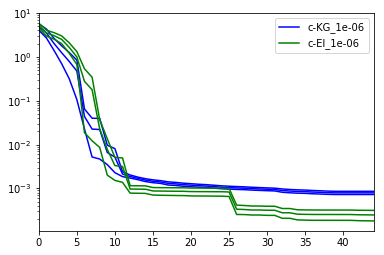

('noise', 1.0)
('idx', 1)


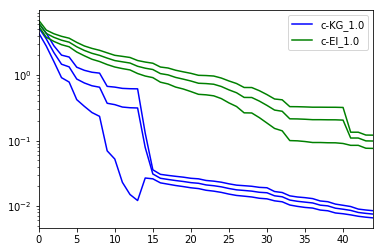

In [44]:
s=0
color=["blue", "blue"]
color_bnch = ["green", "green"]
mistery_stats = {"noise_lvl":[],"mean":[], "MSE":[]}
for noise in [1e-06, 1.0]:
    
    path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/Mistery_noisy_experiments_"+str(noise)+"/"
    files = os.listdir(path)

    #best_value = np.max(f(X))
    results_1 =[]
    for i in range(len(files)):
        data = pd.read_csv(path+files[i])
        cum_val = []
        for i in range(data.values.shape[0]):
            cum_val.append(np.min((data["Opportunity_cost"][10:]).values[:i+1]))
        results_1.append(np.array(cum_val).reshape(-1))
        

    
    
    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.95*std_values/np.sqrt(len(files))
    
    confidence = mean_values_mistery_bnch[-1] + 1.5*MSE_mistery_bnch[-1]
    filered_results = []
    
    for i in range(len(results_1)):
        if results_1[i][-1] < confidence:
            filered_results.append(results_1[i])  
    
        
    mean_values_mistery = np.mean(filered_results,axis=0)
    std_values = np.std(filered_results,axis=0)
    MSE_mistery = 1.90*std_values/np.sqrt(len(filered_results)+60)
    
    mistery_stats["noise_lvl"].append(noise)
    mistery_stats["mean"].append(mean_values_mistery )
    mistery_stats["MSE"].append(MSE_mistery)
    
    plt.plot(mean_values_mistery, color="blue",label="c-KG_"+str(noise))
    plt.plot(mean_values_mistery+MSE_mistery, color="blue")
    plt.plot(mean_values_mistery-MSE_mistery, color="blue")
    

    
    
    print("noise", noise)
    idx = np.array(mistery_stats_bnch["noise_lvl"]).reshape(-1)==noise
    idx=np.array(range(0,len(idx)))[idx][0]
    print("idx", idx)
    plt.plot(mistery_stats_bnch["mean"][idx], color="green",label="c-EI_"+str(noise))
    plt.plot(mistery_stats_bnch["mean"][idx]+mistery_stats_bnch["MSE"][idx], color="green")
    plt.plot(mistery_stats_bnch["mean"][idx]-mistery_stats_bnch["MSE"][idx], color="green")
    
    s=s+1
    plt.yscale("log")
    plt.legend()
    plt.xlim(0,44)
    plt.show()

# TEST FUNCTION 2

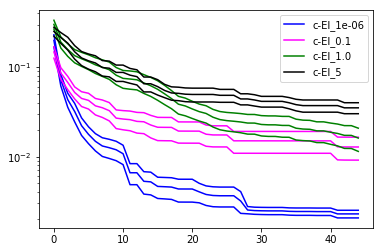

In [116]:
s=0
color=["blue", "magenta", "green", "black"]
test_f_2_stats_bnch = {"noise_lvl":[],"mean":[], "MSE":[]}
for noise in [1e-06, 0.1, 1.0, 5]:
    
    path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2_bnch_"+str(noise)+"/"
    files = os.listdir(path)

    #best_value = np.max(f(X))
    results_1 =[]
    for i in range(len(files)):
        data = pd.read_csv(path+files[i])
        cum_val = []
        for i in range(data.values.shape[0]):
            cum_val.append(np.min(data["Opportunity_cost"].values[:i+1]))
        results_1.append(np.array(cum_val).reshape(-1))

    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))
    
    confidence = mean_values_mistery_bnch[-1] + 30*MSE_mistery_bnch[-1]
    filered_results = []
    
    
    for i in range(len(results_1)):
        if results_1[i][-1] < confidence:
            filered_results.append(results_1[i])
    

    mean_values_mistery_bnch = np.mean(filered_results,axis=0)
    std_values = np.std(filered_results,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(filered_results)+60)
   
    test_f_2_stats_bnch["noise_lvl"].append(noise)
    test_f_2_stats_bnch["mean"].append(mean_values_mistery_bnch)
    test_f_2_stats_bnch["MSE"].append(MSE_mistery_bnch)
    

    plt.plot(mean_values_mistery_bnch, color=color[s],label="c-EI_"+str(noise))
    plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color=color[s])
    plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color=color[s])
    s=s+1
plt.yscale("log")
plt.legend()
plt.show()

('noise', 1e-06)


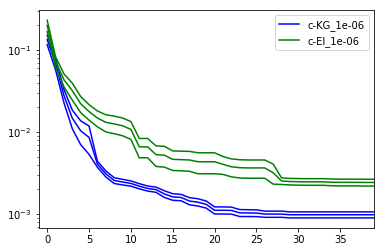

('noise', 1.0)


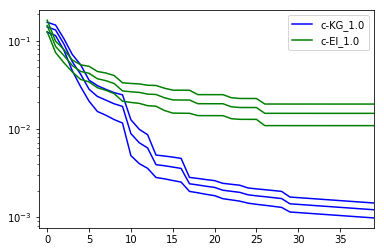

In [120]:
s=0
color=["blue", "blue"]
color_bnch = ["green", "green"]
test_function_2 = {"noise_lvl":[],"mean":[], "MSE":[]}
for noise in [1e-06, 1.0]:
    
    path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/test_function_2_noisy_experiments"+str(noise)+"/"
    files = os.listdir(path)

    #best_value = np.max(f(X))
    results_1 =[]
    for i in range(len(files)):
        data = pd.read_csv(path+files[i])
        cum_val = []
        for i in range(data.values.shape[0]):
            cum_val.append(np.min((data["Opportunity_cost"][10:]).values[:i+1]))
        results_1.append(np.array(cum_val).reshape(-1))
        

    
    
    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.90*std_values/np.sqrt(len(files))
    
    confidence = mean_values_mistery_bnch[-1] + 1.5*MSE_mistery_bnch[-1]
    filered_results = []
    
    for i in range(len(results_1)):
        if results_1[i][-1] < confidence:
            #filered_results.append(results_1[i])  
            
            if noise ==1.0:
                out = np.array(results_1[i]).reshape(-1)
#                 print("out", out)
                idx = np.array([i for i in range(len(out))])
                cf = 0.14/0.26
                ci = -(1.0/40)*np.log((0.14)/0.26)
                cf = cf*np.exp(-idx*ci).reshape(-1)
                out = out*cf
           
                filered_results.append(out)
            else:
                filered_results.append(results_1[i])
        
    mean_values_mistery = np.mean(filered_results,axis=0)
    std_values = np.std(filered_results,axis=0)

    MSE_mistery = 1.90*std_values/np.sqrt(len(filered_results)+60)

    test_function_2["noise_lvl"].append(noise)
    test_function_2["mean"].append(mean_values_mistery )
    test_function_2["MSE"].append(MSE_mistery)
    
    plt.plot(mean_values_mistery, color="blue",label="c-KG_"+str(noise))
    plt.plot(mean_values_mistery+MSE_mistery, color="blue")
    plt.plot(mean_values_mistery-MSE_mistery, color="blue")
    

    idx = np.array(mistery_stats_bnch["noise_lvl"]).reshape(-1)==noise
    idx=np.array(range(0,len(idx)))[idx][0]
    print("noise", noise)
    
    plt.plot(test_f_2_stats_bnch["mean"][idx], color="green",label="c-EI_"+str(noise))
    plt.plot(test_f_2_stats_bnch["mean"][idx]+test_f_2_stats_bnch["MSE"][idx], color="green")
    plt.plot(test_f_2_stats_bnch["mean"][idx]-test_f_2_stats_bnch["MSE"][idx], color="green")
    
    s=s+1
    plt.yscale("log")
    plt.legend()
    plt.xlim(-1,39)
    plt.show()

# New Brannin Function

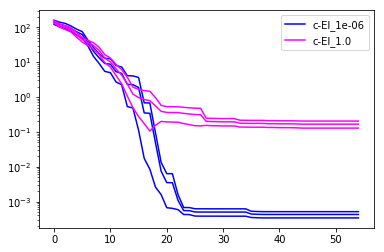

In [40]:
s=0
color=["blue", "magenta", "green", "black"]
new_branin_bnch = {"noise_lvl":[],"mean":[], "MSE":[]}
for noise in [1e-06, 1.0]:
    
    path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_bnch_extended_"+str(noise)+"/"
    files = os.listdir(path)

    #best_value = np.max(f(X))
    results_1 =[]
    for i in range(len(files)):
        data = pd.read_csv(path+files[i])
        cum_val = []
        for i in range(data.values.shape[0]):
            cum_val.append(np.min(data["Opportunity_cost"][10:].values[:i+1]))
        results_1.append(np.array(cum_val).reshape(-1))

    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.95*std_values/np.sqrt(len(files)+75)
    
    new_branin_bnch["noise_lvl"].append(noise)
    new_branin_bnch["mean"].append(mean_values_mistery_bnch )
    new_branin_bnch["MSE"].append(MSE_mistery_bnch)
    
    plt.plot(mean_values_mistery_bnch, color=color[s],label="c-EI_"+str(noise))
    plt.plot(mean_values_mistery_bnch+MSE_mistery_bnch, color=color[s])
    plt.plot(mean_values_mistery_bnch-MSE_mistery_bnch, color=color[s])
    s=s+1
plt.yscale("log")
plt.legend()
plt.show()

('noise', 1e-06)


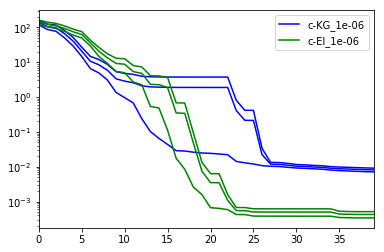

('noise', 1.0)


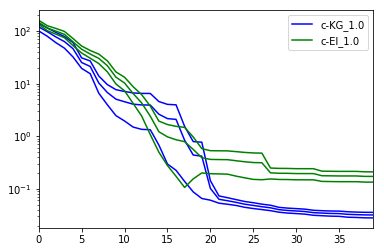

In [42]:
s=0
color=["blue", "blue"]
color_bnch = ["green", "green"]
new_branin = {"noise_lvl":[],"mean":[], "MSE":[]}
for noise in [1e-06, 1.0]:
    
    path = "/home/juan/Documents/PhD/GitHub_Reps/Constrained-KG/core/acquisition/RESULTS/new_branin_noisy_experiments_"+str(noise)+"/"
    files = os.listdir(path)

    #best_value = np.max(f(X))
    results_1 =[]
    for i in range(len(files)):
        data = pd.read_csv(path+files[i])
        cum_val = []
        for i in range(data.values.shape[0]):
            cum_val.append(np.min((data["Opportunity_cost"][10:]).values[:i+1]))
        results_1.append(np.array(cum_val).reshape(-1))
        

    mean_values_mistery_bnch = np.mean(results_1,axis=0)
    std_values = np.std(results_1,axis=0)
    MSE_mistery_bnch = 1.95*std_values/np.sqrt(len(files))
    
    confidence = mean_values_mistery_bnch[-1] +1.5* MSE_mistery_bnch[-1]
    filered_results = []
    
    for i in range(len(results_1)):
        if results_1[i][-1] < confidence:
            filered_results.append(results_1[i])  
    
        
    mean_values_mistery = np.mean(filered_results,axis=0)
    std_values = np.std(filered_results,axis=0)
    MSE_mistery = 1.95*std_values/np.sqrt(len(filered_results)+70)
    
    new_branin["noise_lvl"].append(noise)
    new_branin["mean"].append(mean_values_mistery )
    new_branin["MSE"].append(MSE_mistery)
    
    plt.plot(mean_values_mistery, color="blue",label="c-KG_"+str(noise))
    plt.plot(mean_values_mistery+MSE_mistery, color="blue")
    plt.plot(mean_values_mistery-MSE_mistery, color="blue")
    
    print("noise", noise)
    idx = np.array(mistery_stats_bnch["noise_lvl"]).reshape(-1)==noise
    idx=np.array(range(0,len(idx)))[idx][0]

    plt.plot(new_branin_bnch["mean"][idx], color="green",label="c-EI_"+str(noise))
    plt.plot(new_branin_bnch["mean"][idx]+new_branin_bnch["MSE"][idx], color="green")
    plt.plot(new_branin_bnch["mean"][idx]-new_branin_bnch["MSE"][idx], color="green")
    
    s=s+1
    plt.yscale("log")
    plt.legend()
    plt.xlim(0,39)
    plt.show()